# WeatherPy
----

#### Note
* Three Observations about the data:
- Based on the City Latitude vs. Max Temp graph, the data displays a bell curve indicating that the highest and lowest latitudes equate the lowest temperatures while cities in the middle have the highest temperatures.
- The City Latitude vs. Cloudiness graph shows that latitude and cloudiness do not seem to have a strong relationship with much of the data being skewed.
- Based on the City Latitude vs. Wind Speed, it looks like cities closer to the equator have lower winds but in general shows a weak relationship to each other.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

586

In [9]:
print(cities)

['kodiak', 'freetown', 'samusu', 'nanortalik', 'cabo san lucas', 'torbay', 'carutapera', 'ampanihy', 'puerto ayora', 'rikitea', 'vanimo', 'bredasdorp', 'punta arenas', 'ushuaia', 'burica', 'awbari', 'busselton', 'lavrentiya', 'atuona', 'carnarvon', 'jalu', 'hegra', 'yellowknife', 'saskylakh', 'nikolskoye', 'hamilton', 'port blair', 'muravlenko', 'vaini', 'coquimbo', 'udachnyy', 'ayagoz', 'jamestown', 'barentsburg', 'illoqqortoormiut', 'marcona', 'pundaguitan', 'chuy', 'bathsheba', 'adolfo lopez mateos', 'taolanaro', 'sitka', 'talcahuano', 'cooma', 'betioky', 'mataura', 'cap malheureux', 'hilo', 'lebu', 'antalaha', 'merauke', 'saint-fabien', 'tabou', 'ribeira grande', 'chokurdakh', 'cape town', 'belushya guba', 'bluff', 'pevek', 'lata', 'grand gaube', 'zhemchuzhnyy', 'salalah', 'mahebourg', 'vestmannaeyjar', 'mnogovershinnyy', 'creston', 'davidson', 'hermanus', 'albany', 'upata', 'new norfolk', 'mar del plata', 'port lincoln', 'georgetown', 'lugo', 'butaritari', 'sovik', 'koumac', 'prai

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# api call to get weather data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="

weather_request = requests.get(query_url + city)
weather_json = weather_request.json()
# double check json api request works ---> print(json.dumps(weather_json, indent=4))

In [18]:
# double check ---> print(requests.get(query_url + city))

# make varibles list
city_name = []
country = []
cloudiness = []
date = []
latitude = []
longitude = []
temperature = []
humidity = []
wind_speed = []

# processing record start at 1
processing_record = 1

# print data retrieval header
print(f"Beginning Data Retrieval")
print(f"------------------------")

# loop through list of cities & perform a request for data 
for city in cities:

    # loop through data
    try:
        response = requests.get(query_url + city).json()
        city_record = response["name"]
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        wind_speed.append(response["wind"]["speed"])

        print(f"Processing Record {processing_record} | {city_record}")
        
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# print end statement
print(f"-----------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 | Kodiak
Processing Record 2 | Freetown
City not found. Skipping...
Processing Record 3 | Nanortalik
Processing Record 4 | Cabo San Lucas
Processing Record 5 | Torbay
Processing Record 6 | Carutapera
Processing Record 7 | Ampanihy
Processing Record 8 | Puerto Ayora
Processing Record 9 | Rikitea
Processing Record 10 | Vanimo
Processing Record 11 | Bredasdorp
Processing Record 12 | Punta Arenas
Processing Record 13 | Ushuaia
City not found. Skipping...
Processing Record 14 | Awbari
Processing Record 15 | Busselton
Processing Record 16 | Lavrentiya
Processing Record 17 | Atuona
Processing Record 18 | Carnarvon
Processing Record 19 | Jalu
Processing Record 20 | Hegra
Processing Record 21 | Yellowknife
Processing Record 22 | Saskylakh
Processing Record 23 | Nikolskoye
Processing Record 24 | Hamilton
Processing Record 25 | Port Blair
Processing Record 26 | Muravlenko
Processing Record 27 | Vaini
Processing Record 28 | Coqu

Processing Record 223 | Monroe
Processing Record 224 | Clyde River
Processing Record 225 | Mildura
Processing Record 226 | Husavik
Processing Record 227 | Catuday
City not found. Skipping...
Processing Record 228 | Iqaluit
Processing Record 229 | Rundu
Processing Record 230 | Solnechnyy
Processing Record 231 | Milkovo
Processing Record 232 | Sur
Processing Record 233 | Pimentel
Processing Record 234 | Rivne
Processing Record 235 | Leningradskiy
Processing Record 236 | Nouadhibou
Processing Record 237 | Caravelas
Processing Record 238 | Gayny
City not found. Skipping...
Processing Record 239 | Arraial do Cabo
City not found. Skipping...
Processing Record 240 | Toora-Khem
Processing Record 241 | Severo-Kurilsk
Processing Record 242 | Zaltan
Processing Record 243 | Warrnambool
Processing Record 244 | Concordia
Processing Record 245 | Victoria
Processing Record 246 | Qasigiannguit
Processing Record 247 | Pangnirtung
Processing Record 248 | Yelizovo
Processing Record 249 | Pa Sang
Processin

Processing Record 451 | Kenai
Processing Record 452 | Praxedis Guerrero
Processing Record 453 | Channel-Port aux Basques
City not found. Skipping...
Processing Record 454 | Derzhavinsk
Processing Record 455 | Tautira
Processing Record 456 | Kysyl-Syr
City not found. Skipping...
Processing Record 457 | Plouzane
Processing Record 458 | Magistralnyy
Processing Record 459 | Puerto Baquerizo Moreno
Processing Record 460 | Sheboygan
Processing Record 461 | Mwinilunga
Processing Record 462 | Mbuji-Mayi
Processing Record 463 | Gamba
Processing Record 464 | Karonga
Processing Record 465 | Guarapari
Processing Record 466 | Gari
Processing Record 467 | Tocopilla
Processing Record 468 | Zhigansk
Processing Record 469 | Mana
Processing Record 470 | Tiznit
Processing Record 471 | Khasan
Processing Record 472 | Ixtapa
Processing Record 473 | Acapulco
Processing Record 474 | Plaster Rock
Processing Record 475 | Alice Springs
Processing Record 476 | Praia
City not found. Skipping...
Processing Record 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
weather_dictionary = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": temperature,
    "Wind Speed": wind_speed}

weather_data = pd.DataFrame(weather_dictionary)
weather_data.count()

City          527
Cloudiness    527
Country       527
Date          527
Humidity      527
Lat           527
Lng           527
Max Temp      527
Wind Speed    527
dtype: int64

In [23]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kodiak,1,US,1575590709,57,39.95,-94.76,10.00,2.10
1,Freetown,40,BS,1575590745,72,26.61,-78.36,19.00,1.50
2,Nanortalik,100,GL,1575590687,59,60.14,-45.24,-1.08,3.83
3,Cabo San Lucas,20,MX,1575590745,73,22.89,-109.91,26.00,2.60
4,Torbay,90,CA,1575590720,94,47.66,-52.73,2.22,6.70


In [24]:
# save data to csv file in "Images" folder
weather_data.to_csv("../Images/weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

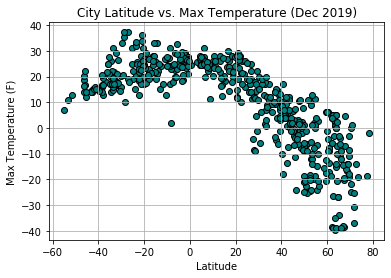

In [25]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], facecolors="teal", marker="o", edgecolor="black")

plt.title("City Latitude vs. Max Temperature (Dec 2019)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save pic to Images folder
plt.savefig("../Images/Lat vs Temp.png")

# display graph
plt.show()

#### Latitude vs. Humidity Plot

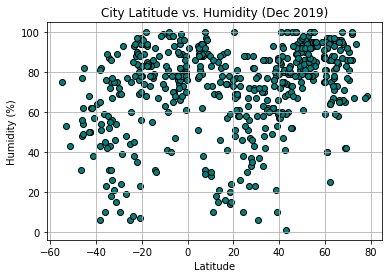

In [26]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], facecolors="teal", marker="o", edgecolor="black")
plt.title("City Latitude vs. Humidity (Dec 2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Images/Lat vs Hum.png")

plt.show()

#### Latitude vs. Cloudiness Plot

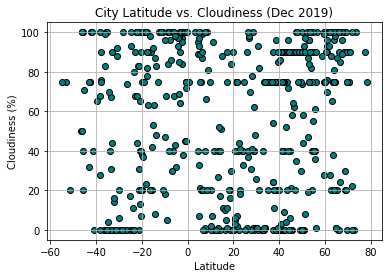

In [27]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], facecolors="teal", marker="o", edgecolor="black")
plt.title("City Latitude vs. Cloudiness (Dec 2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Images/Lat vs Cloud.png")

plt.show()

#### Latitude vs. Wind Speed Plot

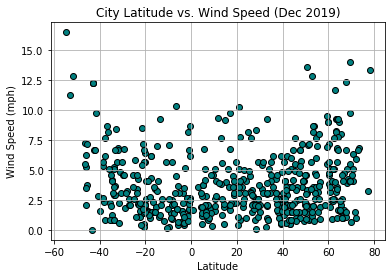

In [28]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], facecolors="teal", marker="o", edgecolor="black")
plt.title("City Latitude vs. Wind Speed (Dec 2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../Images/Lat vs Wind.png")

plt.show()